# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Reading Data

In [6]:
data = pd.read_csv('car dataset.csv')
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['Body'] = encoder.fit_transform(data['Body'])

In [19]:
data['EngineV'].dropna()

0       2.0
1       2.9
2       5.0
3       4.2
4       2.0
       ... 
4339    1.6
4340    3.0
4341    3.5
4342    2.0
4344    2.0
Name: EngineV, Length: 4195, dtype: float64

In [43]:
data.head()
data.shape

(4345, 9)

In [35]:
t = pd.DataFrame(data['Price'])
t['EngineV'] = data['EngineV']
t = t.dropna()
t.isnull().sum()

Price      0
EngineV    0
dtype: int64

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(5)
result = kmeans.fit_predict(t)
t['Predictions'] = result
t.head()

,Price,EngineV,Predictions
0,4200.0,2.0,3
1,7900.0,2.9,3
2,13300.0,5.0,3
3,23000.0,4.2,0
4,18300.0,2.0,0


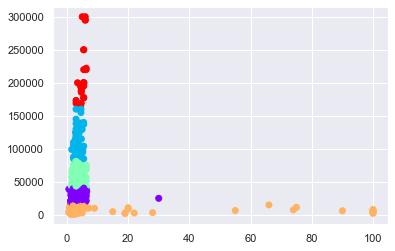

In [42]:
plt.scatter(t['EngineV'],t['Price'], c= t['Predictions'], cmap='rainbow')

# Understanding Data

In [3]:
data.nunique()

Brand             7
Price           906
Body              6
Mileage         410
EngineV          73
Engine Type       4
Registration      2
Year             39
Model           312
dtype: int64

In [4]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
Brand           4345 non-null object
Price           4173 non-null float64
Body            4345 non-null object
Mileage         4345 non-null int64
EngineV         4195 non-null float64
Engine Type     4345 non-null object
Registration    4345 non-null object
Year            4345 non-null int64
Model           4345 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.020959,-0.668635
EngineV,0.058664,0.020959,1.000000,-0.022866
Year,0.487031,-0.668635,-0.022866,1.000000


### From above summary statistics we can infer that data has missing values and it contains outliers

### Currently the maximum value of EngineV is 9.3L, in our data we have some of 99.99L which is not possible for a car, hence these are outliers that we have to discard as they might affect our calculations

# Data Visualisation

C:\Users\risha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\risha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


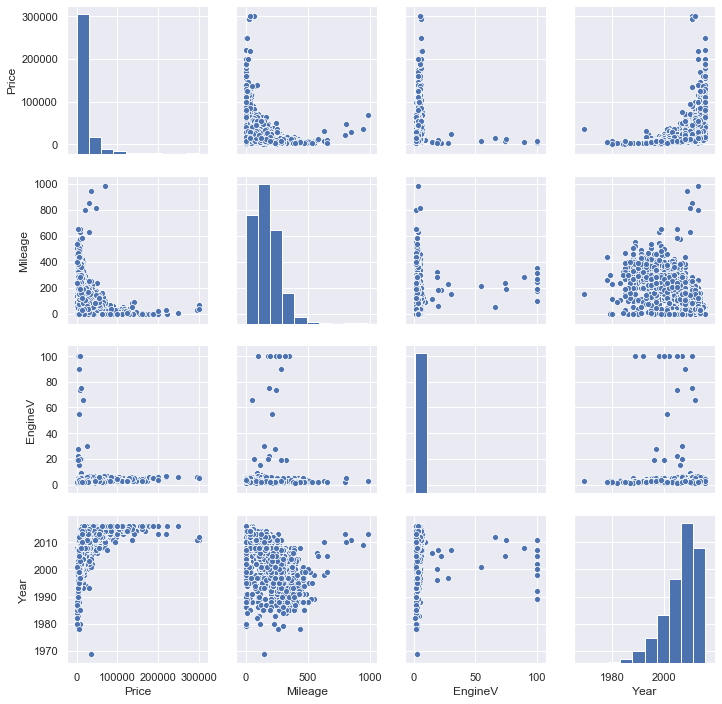

In [7]:
sns.pairplot(data)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

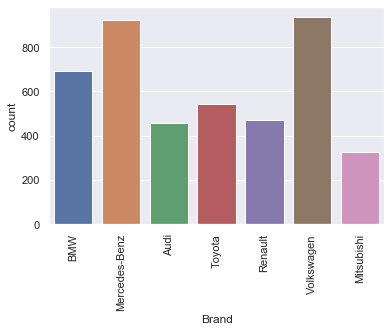

In [8]:
sns.countplot(x=data['Brand'], data=data)

plt.xticks(rotation=90)

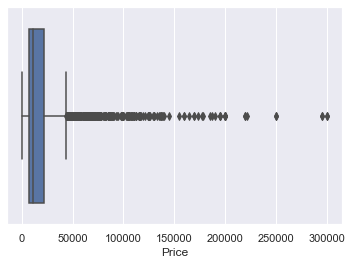

In [9]:
sns.boxplot(data['Price'])

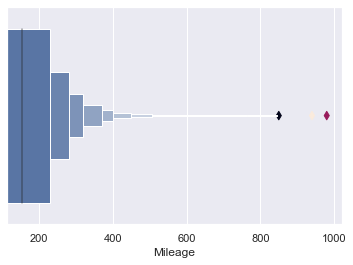

In [10]:
sns.boxenplot(data['Mileage'])

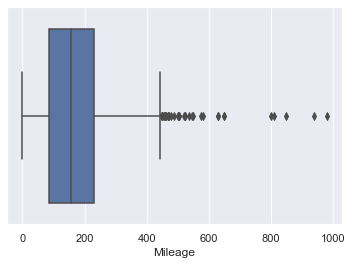

In [11]:
sns.boxplot(data['Mileage'])

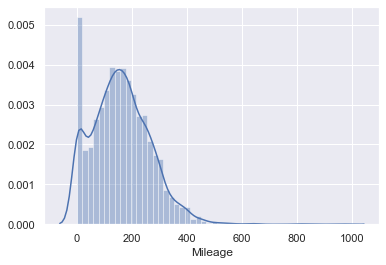

In [12]:
sns.distplot(data['Mileage'])

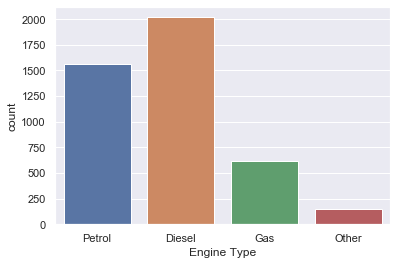

In [13]:
sns.countplot(data['Engine Type'])

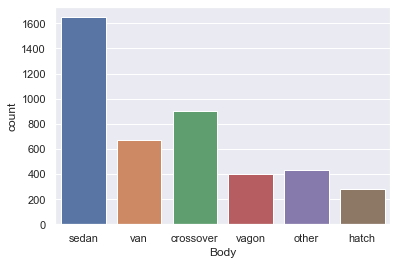

In [14]:
sns.countplot(data['Body'])

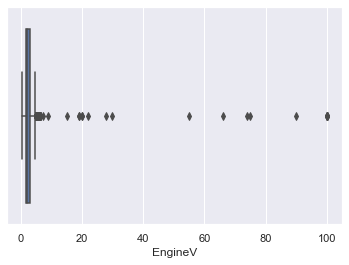

In [15]:
sns.boxplot(data['EngineV'])

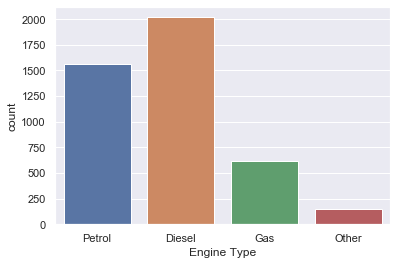

In [16]:
sns.countplot(data['Engine Type'])

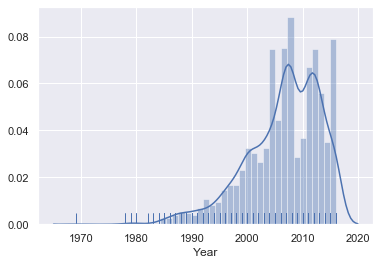

In [17]:
sns.distplot(data['Year'], hist=True, rug = True, kde= True)

C:\Users\risha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\risha\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


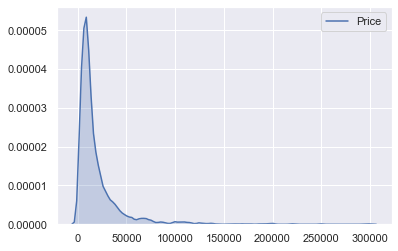

In [18]:
sns.kdeplot(data['Price'], shade=True)

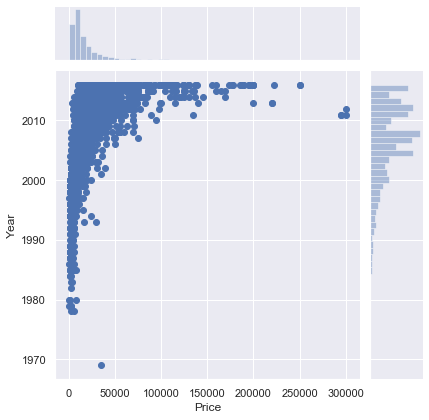

In [19]:
sns.jointplot(data['Price'], data['Year'])

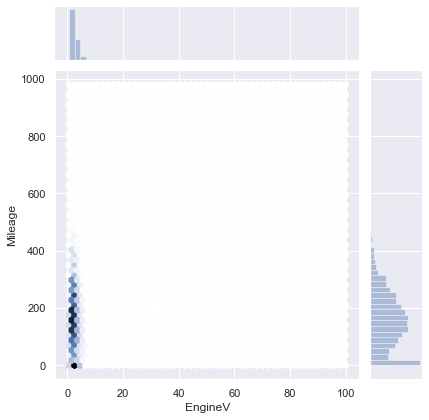

In [20]:
sns.jointplot(data['EngineV'], data['Mileage'], kind='hex')

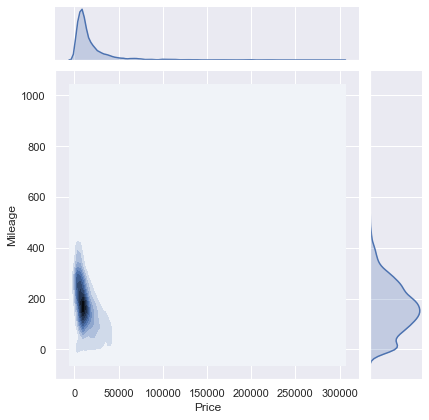

In [21]:
sns.jointplot(data['Price'], data['Mileage'], kind='kde')

In [22]:
cols = data.columns
cols

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

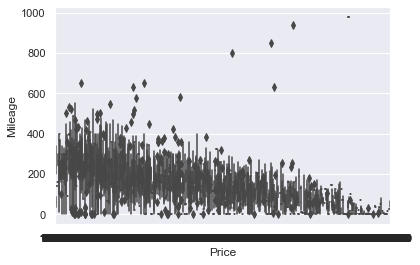

In [23]:
sns.boxplot(x=data['Price'], y=data['Mileage'], palette='rainbow')

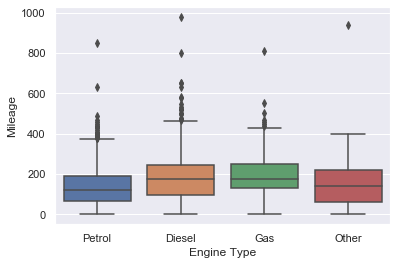

In [24]:
sns.boxplot(x=data['Engine Type'], y= data['Mileage'], data=data)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

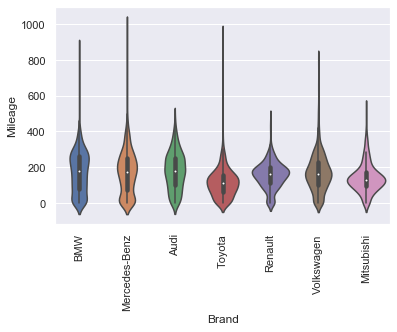

In [25]:
sns.violinplot(x=data['Brand'], y= data['Mileage'], data=data)

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

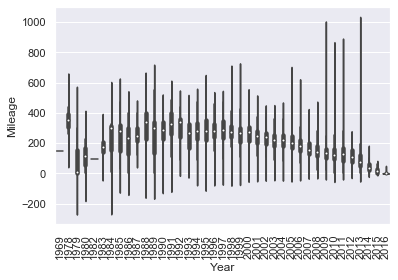

In [26]:
sns.violinplot(x=data['Year'], y= data['Mileage'], data=data)

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

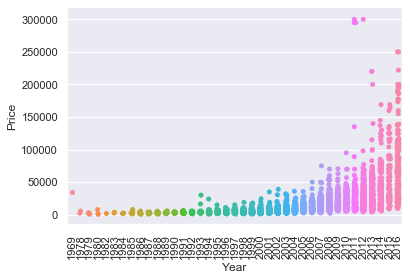

In [27]:
sns.stripplot(x=data['Year'], y= data['Price'], data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

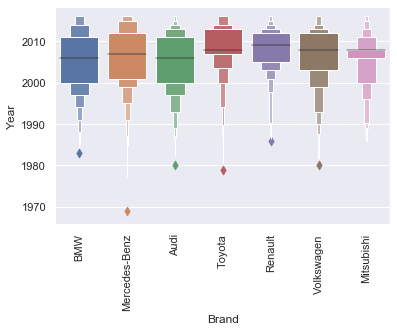

In [28]:
sns.boxenplot(x=data['Brand'], y= data['Year'], data=data)
plt.xticks(rotation=90)

# Imputation of missing values with mode

In [29]:
values = data.values
x = values[:, np.r_[0:1,2:9]]
y = values[:, 1]

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
transformed_data = imputer.fit_transform(values)

In [31]:
col = data.columns
col

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [32]:
data_trans = pd.DataFrame(data = transformed_data[0:,0:],index=(i for i in range(len(transformed_data))), columns=col)
data_trans = data_trans.drop('Model', axis=1)
data_trans.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200,sedan,277,2,Petrol,yes,1991
1,Mercedes-Benz,7900,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300,sedan,358,5,Gas,yes,2003
3,Audi,23000,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300,crossover,120,2,Petrol,yes,2011


# Handling Outliers

In [33]:
data_trans.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### Removing values that are either more than 3 std away from mean or in 25 or 75 %ile of IQR range
#### Z score value should be between -3,3 as it is equal to 3 stds

In [34]:
Q1 = data_trans['Price'].quantile(0.01)
Q2 = data_trans['Price'].quantile(0.99)

data_trans = data_trans[data_trans['Price']<Q2]
data_trans = data_trans[data_trans['Price']>Q1]
data_trans.shape

(4252, 8)

### We are removing top and bottom 1% data of outlier for Price using IQR

In [35]:
data_trans = data_trans[data_trans['Mileage']<(4.5*np.std(data_trans['Mileage']))]
data_trans.shape

(4229, 8)

### Here we removed values that were 5 standard deviations away from mean

In [36]:
data_trans = data_trans[data_trans['EngineV']<20]
data_trans.shape

(4211, 8)

## Data Cleaning complete

# Variable Transformation

In [43]:
data_trans['Price'] = data_trans['Price'].astype(int)
data_trans['Mileage'] = data_trans['Mileage'].astype(int)
data_trans['EngineV'] = data_trans['EngineV'].astype(int)
data_trans['Year'] = data_trans['Year'].astype(int)

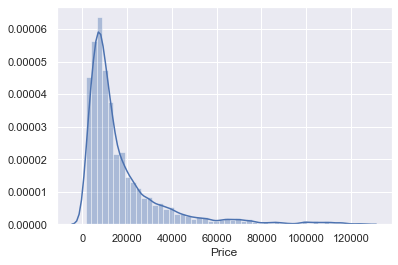

In [44]:
sns.distplot(data_trans['Price'])

In [45]:
log_price = np.log(data_trans['Price'])
data_trans_log = data_trans.copy()
data_trans_log['Log Price'] = log_price
data_trans_log = data_trans_log.drop('Price', axis=1)
data_trans_log.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5,Gas,yes,2003,9.495519
3,Audi,crossover,240,4,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2,Petrol,yes,2011,9.814656


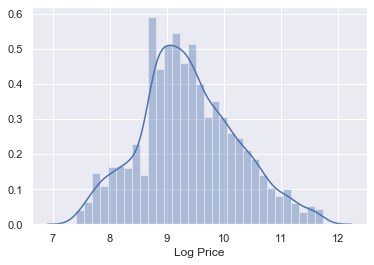

In [46]:
sns.distplot(data_trans_log['Log Price'])

### As you can see data is more normally distributed now

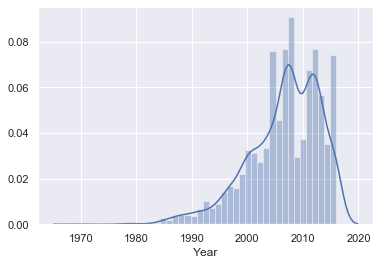

In [47]:
sns.distplot(data_trans_log['Year'])

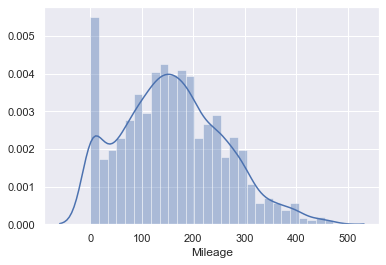

In [48]:
sns.distplot(data_trans_log['Mileage'])

### Transformation is done, we can also use squre or cube instead of log

# Adding Dummy Variables, also called as One Hot encoding

In [49]:
data_with_dummies = pd.get_dummies(data_trans_log, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,Year,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [50]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

# For some cases we can use Label Encoders instead of Dummy Variables

In [52]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_encoded = data_trans_log.copy()
data_encoded['Brand'] = encoder.fit_transform(data_trans_log['Brand'])
data_encoded['Body'] = encoder.fit_transform(data_trans_log['Body'])
data_encoded['Registration'] = encoder.fit_transform(data_trans_log['Registration'])
data_encoded['Engine Type'] = encoder.fit_transform(data_trans_log['Engine Type'])
data_encoded.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,1,3,277,2,3,1,1991,8.342840
1,2,5,427,2,0,1,1999,8.974618
2,2,3,358,5,1,1,2003,9.495519
3,0,0,240,4,3,1,2007,10.043249
4,5,0,120,2,3,1,2011,9.814656


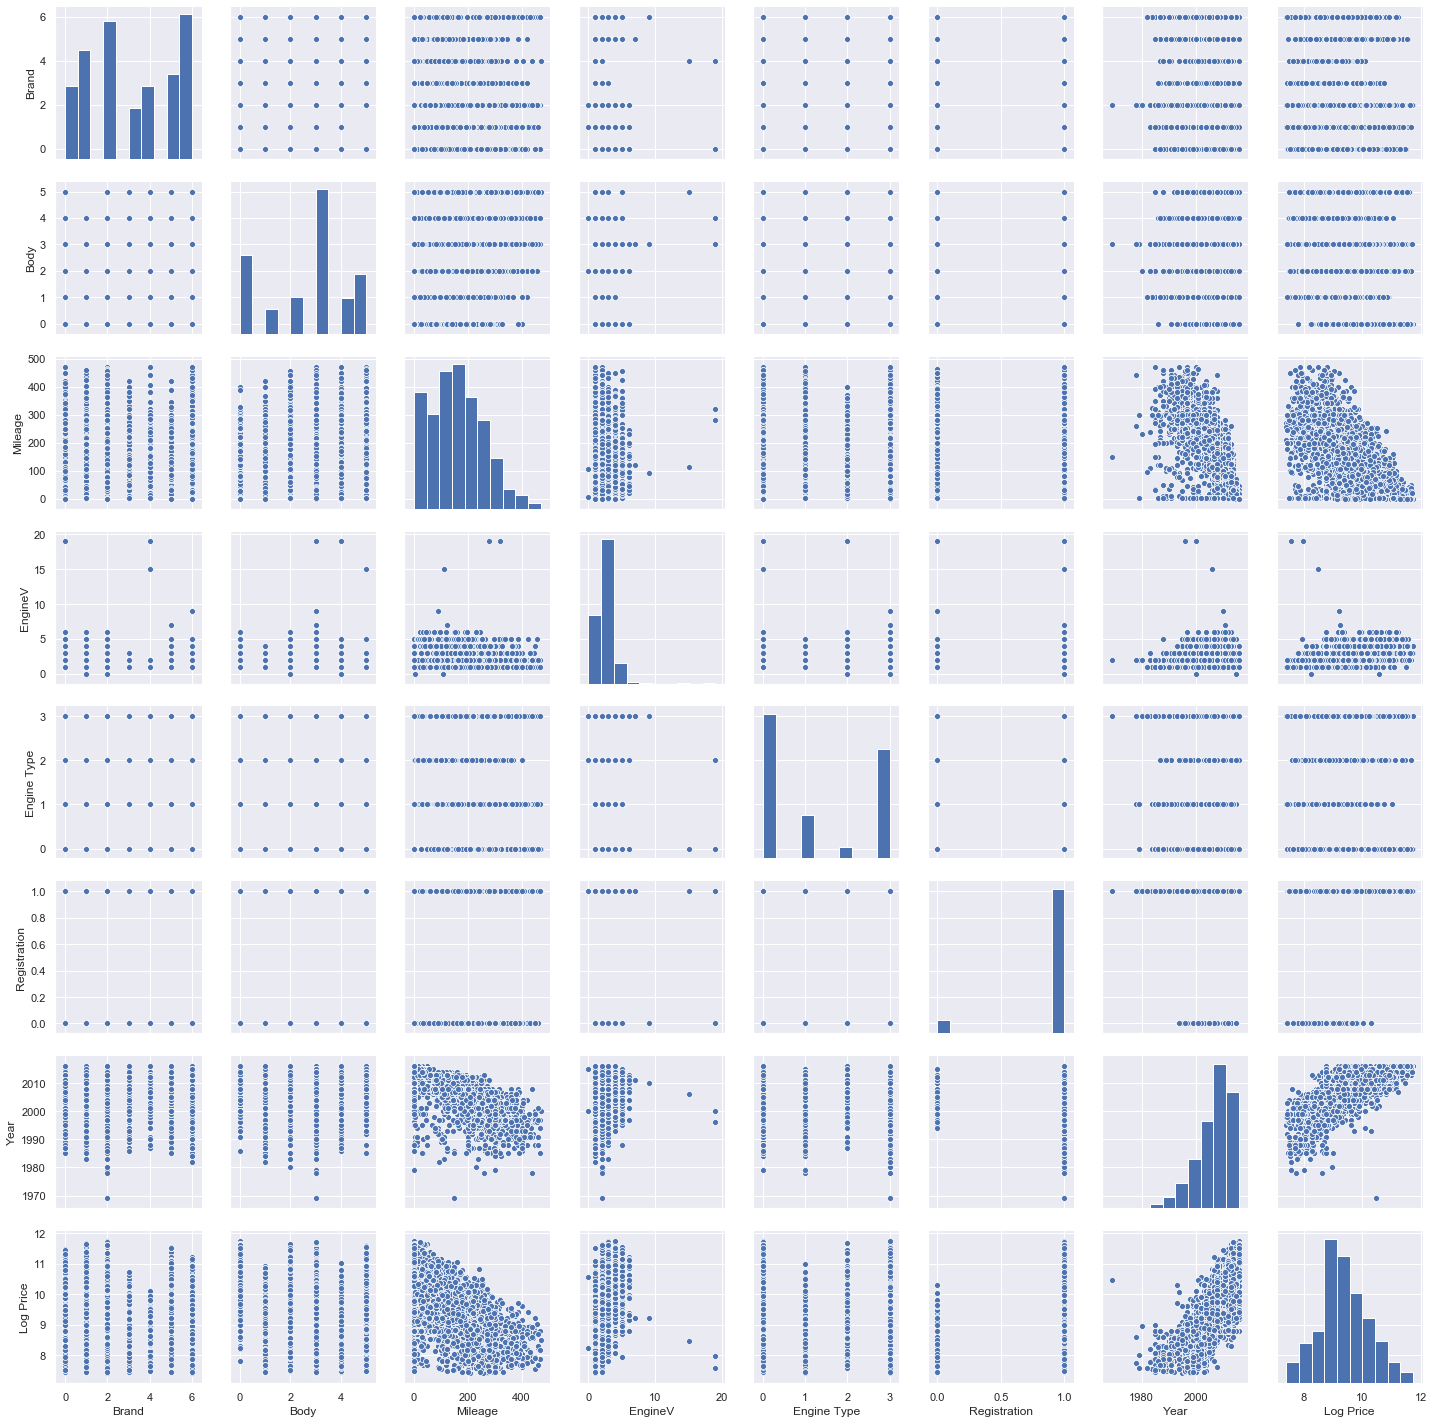

In [53]:
sns.pairplot(data_encoded)

## If we want to apply label encoding in whole dataset then

In [54]:
data_encoded.apply(encoder.fit_transform).head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,1,3,276,2,3,1,13,77
1,2,5,375,2,0,1,21,171
2,2,3,339,5,1,1,25,318
3,0,0,239,4,3,1,29,487
4,5,0,119,2,3,1,33,419


# Checking and removing Duplicate data

In [55]:
data_with_dummies.duplicated().sum()

93

In [57]:
data_cleaned = data_with_dummies.drop_duplicates()
data_cleaned.head()

,Mileage,EngineV,Year,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [59]:
data_encoded = data_encoded.drop_duplicates()
data_encoded.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,1,3,277,2,3,1,1991,8.342840
1,2,5,427,2,0,1,1999,8.974618
2,2,3,358,5,1,1,2003,9.495519
3,0,0,240,4,3,1,2007,10.043249
4,5,0,120,2,3,1,2011,9.814656


# Standardizing the data

In [61]:
targets = data_cleaned['Log Price']
inputs = data_cleaned.drop('Log Price', axis=1)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_processed = scaler.fit_transform(inputs)
data_processed

array([[ 1.17029825, -0.10753487, -2.39824497, ..., -0.19375485,
         1.34072904,  0.31279478],
       [ 2.69335229, -0.10753487, -1.16216465, ..., -0.19375485,
        -0.74586287,  0.31279478],
       [ 1.99274743,  2.58716246, -0.54412448, ..., -0.19375485,
        -0.74586287,  0.31279478],
       ...,
       [-1.63212118,  0.79069757, -1.16216465, ..., -0.19375485,
         1.34072904,  0.31279478],
       [ 0.32754168, -0.10753487, -3.32530522, ..., -0.19375485,
         1.34072904,  0.31279478],
       [-1.32751037, -0.10753487,  1.15548597, ..., -0.19375485,
         1.34072904,  0.31279478]])

In [63]:
targets_label = data_encoded['Log Price']
inputs_label = data_encoded.drop('Log Price', axis=1)

In [65]:
data_scaled = scaler.fit_transform(inputs_label)
data_scaled

array([[-1.03392299,  0.25905194,  1.17029825, ...,  1.260046  ,
         0.31279478, -2.39824497],
       [-0.55558405,  1.4726764 ,  2.69335229, ..., -0.94767039,
         0.31279478, -1.16216465],
       [-0.55558405,  0.25905194,  1.99274743, ..., -0.21176493,
         0.31279478, -0.54412448],
       ...,
       [-1.03392299,  0.25905194, -1.63212118, ...,  1.260046  ,
         0.31279478, -1.16216465],
       [-1.03392299,  0.25905194,  0.32754168, ...,  1.260046  ,
         0.31279478, -3.32530522],
       [ 0.87943275,  0.25905194, -1.32751037, ...,  1.260046  ,
         0.31279478,  1.15548597]])

# Train Test Split data

In [134]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_processed, targets, test_size = 0.2, random_state = 365)

In [80]:
x_train_l , x_test_l, y_train_l, y_test_l = train_test_split(data_scaled, targets_label, test_size = 0.2, random_state = 200)

# Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train_l, y_train_l)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred_l = reg.predict(x_train_l)

In [135]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

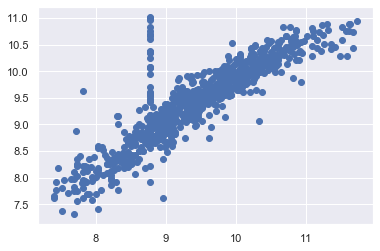

In [136]:
plt.scatter(y_test, y_pred)

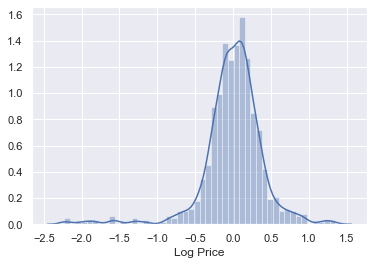

In [97]:
sns.distplot(y_test - y_pred)

### The model is fit properly, there were some overestimated values

### calculate R2

In [86]:
reg.score(x_train, y_train)

0.7697692809151282

In [83]:
reg.score(x_train_l, y_train_l)

0.7204700815197134

## Dummy variable dataset has better score than Label encoder one

In [87]:
reg.coef_

array([-0.08566539,  0.13777194,  0.46606326,  0.0223717 , -0.00273654,
       -0.13125803, -0.2009383 , -0.05759043, -0.09685606, -0.12148721,
       -0.0885031 , -0.17489475, -0.11889018, -0.1724544 , -0.02499945,
       -0.01711859, -0.03141637,  0.24439705])

In [88]:
reg.intercept_

9.366534841579089

In [98]:
reg.score(x_test, y_test)

0.7760712973995878

# Comparing Predictions

In [119]:
comp_df = pd.DataFrame(np.exp(y_pred), columns=['Predictions'])
comp_df.head()

,Predictions
0,32993.788434
1,2781.482975
2,30770.842761
3,7674.012668
4,20098.241133


In [120]:
comp_df['Target'] = np.exp(y_test)
y_test = y_test.reset_index(drop=True)
comp_df['Target'] = np.exp(y_test)
comp_df.head()

,Predictions,Target
0,32993.788434,42000.0
1,2781.482975,2500.0
2,30770.842761,50250.0
3,7674.012668,10000.0
4,20098.241133,21000.0


In [121]:
comp_df['Residuals'] = comp_df['Predictions'] - comp_df['Target']
comp_df.head()

,Predictions,Target,Residuals
0,32993.788434,42000.0,-9006.211566
1,2781.482975,2500.0,281.482975
2,30770.842761,50250.0,-19479.157239
3,7674.012668,10000.0,-2325.987332
4,20098.241133,21000.0,-901.758867


In [122]:
comp_df.shape

(824, 3)

In [125]:
comp_df['Difference %'] = np.absolute((comp_df['Residuals']/comp_df['Target'])*100)
comp_df.head()

,Predictions,Target,Residuals,Difference %
0,32993.788434,42000.0,-9006.211566,21.443361
1,2781.482975,2500.0,281.482975,11.259319
2,30770.842761,50250.0,-19479.157239,38.764492
3,7674.012668,10000.0,-2325.987332,23.259873
4,20098.241133,21000.0,-901.758867,4.294090


In [128]:
comp_df.sort_values(by=['Difference %'], ascending = False)

,Predictions,Target,Residuals,Difference %
520,60621.650460,6500.0,54121.650460,832.640776
564,60516.282280,6500.0,54016.282280,831.019727
766,57343.727591,6500.0,50843.727591,782.211194
541,50255.784710,6500.0,43755.784710,673.165919
240,46705.239760,6500.0,40205.239760,618.542150
...,...,...,...,...
663,25092.414245,25000.0,92.414245,0.369657
685,15247.408712,15300.0,-52.591288,0.343734
568,3004.057461,2999.0,5.057461,0.168638
654,12018.027398,12000.0,18.027398,0.150228


## Confusion matrix can be applied only for classification not regression

# We have used Train_test_split now we'll use k fold cross validation

### Train_test_split can result in overfitting so we will use cross validation k fold technique, in which we will train our model to k-1 datasets and we'll test our model agains the last k set

In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 5, random_state=10)
result = cross_val_score(reg , X = x_train, y = y_train, cv=kfold)
result.mean()

0.7643542242748561

### Here we are using kfold as the cross val score calculator, we can use cross val scores as well

In [154]:
result = cross_val_score(reg , X = x_train, y = y_train, cv=12)
result.mean()

0.7636160969041638

#### Here the cross validation score has changed